# Lesson 1 - What's your pet

Welcome to lesson 1! For those of you who are using a Jupyter Notebook for the first time, you can learn about this useful tool in a tutorial we prepared specially for you; click `File`->`Open` now and click `00_notebook_tutorial.ipynb`. 

In this lesson we will build our first image classifier from scratch, and see if we can achieve world-class results. Let's dive in!

Every notebook starts with the following three lines; they ensure that any edits to libraries you make are reloaded here automatically, and also that any charts or images displayed are shown in this notebook.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

We import all the necessary packages. We are going to work with the [fastai V1 library](http://www.fast.ai/2018/10/02/fastai-ai/) which sits on top of [Pytorch 1.0](https://hackernoon.com/pytorch-1-0-468332ba5163). The fastai library provides many useful functions that enable us to quickly and easily build neural networks and train our models.

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

If you're using a computer with an unusually small GPU, you may get an out of memory error when running this notebook. If this happens, click Kernel->Restart, uncomment the 2nd line below to use a smaller *batch size* (you'll learn all about what this means during the course), and try again.

In [3]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

## Looking at the data

We are going to use the [Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/) by [O. M. Parkhi et al., 2012](http://www.robots.ox.ac.uk/~vgg/publications/2012/parkhi12a/parkhi12a.pdf) which features 12 cat breeds and 25 dogs breeds. Our model will need to learn to differentiate between these 37 distinct categories. According to their paper, the best accuracy they could get in 2012 was 59.21%, using a complex model that was specific to pet detection, with separate "Image", "Head", and "Body" models for the pet photos. Let's see how accurate we can be using deep learning!

We are going to use the `untar_data` function to which we must pass a URL as an argument and which will download and extract the data.

In [4]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if it doesn't exist, and un-tgz to folder `dest`.



In [5]:
path = untar_data(URLs.PETS); path

PosixPath('/notebooks/course-v3/nbs/dl1/data/oxford-iiit-pet')

In [6]:
path.ls()

[PosixPath('/notebooks/course-v3/nbs/dl1/data/oxford-iiit-pet/images'),
 PosixPath('/notebooks/course-v3/nbs/dl1/data/oxford-iiit-pet/annotations')]

In [7]:
path_anno = path/'annotations'
path_img = path/'images'

In [8]:
path_img

PosixPath('/notebooks/course-v3/nbs/dl1/data/oxford-iiit-pet/images')

In [9]:
path_anno

PosixPath('/notebooks/course-v3/nbs/dl1/data/oxford-iiit-pet/annotations')

The first thing we do when we approach a problem is to take a look at the data. We _always_ need to understand very well what the problem is and what the data looks like before we can figure out how to solve it. Taking a look at the data means understanding how the data directories are structured, what the labels are and what some sample images look like.

The main difference between the handling of image classification datasets is the way labels are stored. In this particular dataset, labels are stored in the filenames themselves. We will need to extract them to be able to classify the images into the correct categories. Fortunately, the fastai library has a handy function made exactly for this, `ImageDataBunch.from_name_re` gets the labels from the filenames using a [regular expression](https://docs.python.org/3.6/library/re.html).

In [10]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/notebooks/course-v3/nbs/dl1/data/oxford-iiit-pet/images/Egyptian_Mau_103.jpg'),
 PosixPath('/notebooks/course-v3/nbs/dl1/data/oxford-iiit-pet/images/Egyptian_Mau_94.jpg'),
 PosixPath('/notebooks/course-v3/nbs/dl1/data/oxford-iiit-pet/images/english_cocker_spaniel_152.jpg'),
 PosixPath('/notebooks/course-v3/nbs/dl1/data/oxford-iiit-pet/images/saint_bernard_59.jpg'),
 PosixPath('/notebooks/course-v3/nbs/dl1/data/oxford-iiit-pet/images/pomeranian_141.jpg')]

In [11]:
len(fnames)

7390

In [12]:
np.random.seed(2)
pat = re.compile(r'/([^/]+)_\d+.jpg$')

In [13]:
pat

re.compile(r'/([^/]+)_\d+.jpg$', re.UNICODE)

In [14]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

In [15]:
data

ImageDataBunch;

Train: LabelList
y: CategoryList (5912 items)
[Category Egyptian_Mau, Category Egyptian_Mau, Category english_cocker_spaniel, Category english_setter, Category american_bulldog]...
Path: /notebooks/course-v3/nbs/dl1/data/oxford-iiit-pet/images
x: ImageItemList (5912 items)
[Image (3, 500, 334), Image (3, 135, 189), Image (3, 500, 368), Image (3, 333, 500), Image (3, 281, 500)]...
Path: /notebooks/course-v3/nbs/dl1/data/oxford-iiit-pet/images;

Valid: LabelList
y: CategoryList (1478 items)
[Category pomeranian, Category scottish_terrier, Category samoyed, Category leonberger, Category British_Shorthair]...
Path: /notebooks/course-v3/nbs/dl1/data/oxford-iiit-pet/images
x: ImageItemList (1478 items)
[Image (3, 375, 500), Image (3, 367, 500), Image (3, 334, 500), Image (3, 375, 500), Image (3, 500, 375)]...
Path: /notebooks/course-v3/nbs/dl1/data/oxford-iiit-pet/images;

Test: None

In [16]:
path_img

PosixPath('/notebooks/course-v3/nbs/dl1/data/oxford-iiit-pet/images')

In [17]:
fnames[:5]

[PosixPath('/notebooks/course-v3/nbs/dl1/data/oxford-iiit-pet/images/Egyptian_Mau_103.jpg'),
 PosixPath('/notebooks/course-v3/nbs/dl1/data/oxford-iiit-pet/images/Egyptian_Mau_94.jpg'),
 PosixPath('/notebooks/course-v3/nbs/dl1/data/oxford-iiit-pet/images/english_cocker_spaniel_152.jpg'),
 PosixPath('/notebooks/course-v3/nbs/dl1/data/oxford-iiit-pet/images/saint_bernard_59.jpg'),
 PosixPath('/notebooks/course-v3/nbs/dl1/data/oxford-iiit-pet/images/pomeranian_141.jpg')]

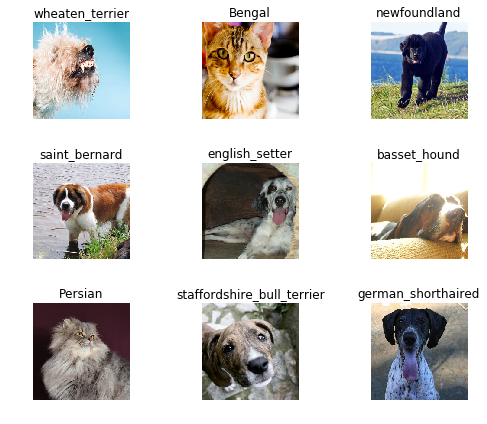

In [18]:
data.show_batch(rows=3, figsize=(7,6))

In [19]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

## Training: resnet34

Now we will start training our model. We will use a [convolutional neural network](http://cs231n.github.io/convolutional-networks/) backbone and a fully connected head with a single hidden layer as a classifier. Don't know what these things mean? Not to worry, we will dive deeper in the coming lessons. For the moment you need to know that we are building a model which will take images as input and will output the predicted probability for each of the categories (in this case, it will have 37 outputs).

We will train for 4 epochs (4 cycles through all our data).

In [20]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [32]:
learn_not_pretrained = create_cnn(data, models.resnet34, metrics=error_rate,pretrained=False)

In [33]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

## Q4. Explain what is a residual network, and the basic motivation for using it. Also explain what are the main elements of resnet34 and resnet50. How many layers, how many neurons total, how many weights; and then anything else you want to say.

As per my understanding, let me begin my answer with the motivation behind the adoption of ResNet. 

Before Resnet, the architectures like AlexNet (8 layers), VGG Net (11,16,19 layers), Googlenet (22 layers) proved that a deeper network (more layers) is needed for improved accuracy in theory. But, one of the problems with these deep neural networks is that it’s difficult to train them because of vanishing and exploding gradients. This happens because the weights in between can get very very big/small which will affect the output y value ( which involves repeated multiplication of weights). The activation values will explode/decrease exponentially as a function of number of layers and this makes training difficult and training error becomes worse in practice. Another problem being if the gradients are extremely small, then it takes tiny steps and more time to learn. Naive solution like carefully initialising the weights is one way to go about it. 

But another efficient method is to use skip connections, which allows you to take the activation from one layer and directly feed to another layer away which is somewhere deeper in the network. So the layers in between don’t really hurt the neural network's ability and performs as well as a simpler network as the identity function in this residual block copies the activation despite the addition of extra layers. This is the core logic behind Resnet working and can be interpreted as deeper network with skip connections performing identity mapping to solve the problem of vanishing/exploding gradient. 



### Main Elements of Resnet34 and Resnet50

The main idea is to add an identify connection every few layers that adds the source of the residual block to the output of the block. One really nice thing about these shortcuts is that we don't add any new parameters and the computational time is not affected. 


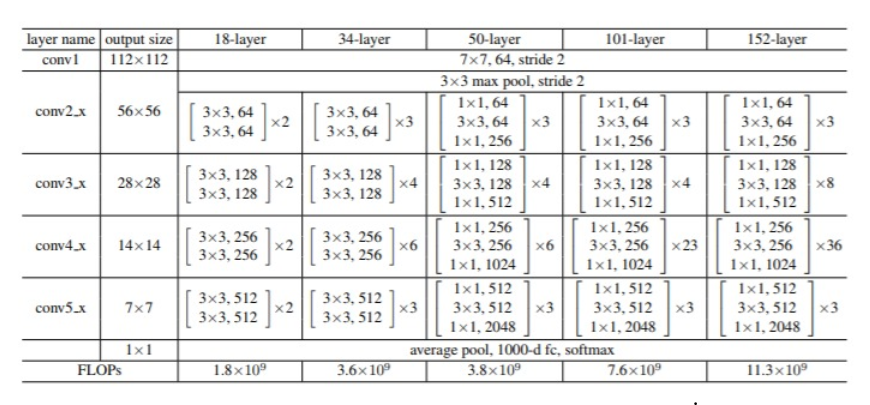

In [14]:
from IPython.display import Image
Image(filename='Basic Resnet architecture.png')

### Layers

Resnet34 layers: (3+4+6+3)*2+2  = 34 layers 

Resnet50 layers: (3+4+6+3)*3+2  = 50 layers     

### Neurons 

n = Input image size
f = filter size
p = padding 
s = strides
output size = ((n-f+ 2p)/s) + 1, 
neurons = output size x channels
##### Resnet34
From conv1
Image_size=224x224x3
f=7
p=2
s=2
Output size= ((224-7+4)/2)+1 = 112,
neurons = 112*112*64 = 802816
##### Resnet50
From conv1
Image_size=224x224x3
f=7
p=2
s=2
Output size= ((224-7+4)/2)+1 = 112,
neurons = 112*112*64 = 802816

### Weights 

Parameters to train in ResNet34 are 21.8M and in ResNet50 are 25.6M

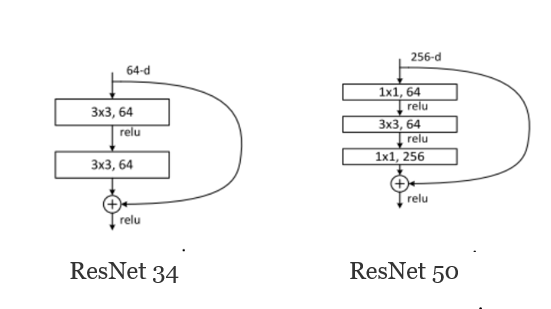

In [13]:
Image(filename='Difference.png')

ResNet 50 uses three consecutive convolutional layers and the main difference is the filter dimensions. In Resnet34 64 dimensional filter input is being passed on while in Resnet50, 256 dimensional filter input is reduced to 64 in the first two layers and then scaled back to 256 in the next 1*1 layer. 

## Question 5:Transfer learning using Fast.ai and create cnn: Please explain how pretrained resnet34 is modified to get the network that the notebook ultimately trains (i.e., explain what are the last layers that are added).


In [ ]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Automatically downloads pre-trained weights of resnet 34 architecture. This particular model has already been trained on imagenet dataset. We start with a model that can recognise thousand categories of things in imagenet. Hence it certainly captures the aspects of images and animals characteristics in general.


Following this starts the process of ‘Transfer Learning’ 


In [ ]:
Learn.model

Learner will cut the model defined by the architecture at the last convolutional layer by default unless specified and adds a pooling, flatten and blocks of activation layers. The first block will have inputs inferred from the original architecture and the last will have a number of outputs equal to data. 

In [ ]:
learn.fit_one_cycle(4)

We are all set now to learn a model for our new data and ‘Fit_onecyle()’ will train only last few layers. 
The specific dimensions of the layers added to our model is mentioned below: 

Flatten()

BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

Linear(in_features=1024, out_features=512, bias=True)

BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

Linear(in_features=512, out_features=37, bias=True)
In this step our learner follows one cycle policy and we are training for 4 epochs (4 cycles through all our data) and we notice that the error rate is as small as 7% approx which proves that the pre-trained weights of resnet34 with additional sequential layer in the end worked on our dataset as well. This entire process of using pre-trained weights by adding/modifying last few layers is called Transfer Learning.

## Q6.Download a NOT pretrained resnet 34, and then by playing with the number of epochs and learning rates (possibly different learning rates across layers), see how low you can get the error. Can you get below 20%? 
Using not pre-trained resnet34

In [34]:
learn_not_pretrained.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [24]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate
1,1.529462,0.386735,0.112314
2,0.586458,0.263046,0.081191
3,0.364066,0.251571,0.079161
4,0.274844,0.222486,0.069689
5,0.223730,0.224949,0.067659


In [35]:
learn_not_pretrained.fit_one_cycle(60)

epoch,train_loss,valid_loss,error_rate
1,4.015201,3.612436,0.949932
2,3.935602,3.557956,0.942490
3,3.841002,3.517902,0.939107
4,3.771163,3.477967,0.924222
5,3.667820,3.380749,0.898512
6,3.575754,3.301099,0.881597
7,3.477804,3.278280,0.892422
8,3.370438,3.209911,0.878214
9,3.256404,3.126095,0.852503
10,3.134320,3.042403,0.830176


The ResNet34 when trained from scratch doesn't perform well because training data is too small for neural nets to give accurate weights. 
Had there been more images, ResNet34 might have had performed better when trained from scratch. For now, weights learnt from transfer learning results in much more accurate prediction 

In [37]:
learn.save('stage-1')
learn_not_pretrained.save('stage-1-pre-trained')

## Results

Let's see what results we have got. 

We will first see which were the categories that the model most confused with one another. We will try to see if what the model predicted was reasonable or not. In this case the mistakes look reasonable (none of the mistakes seems obviously naive). This is an indicator that our classifier is working correctly. 

Furthermore, when we plot the confusion matrix, we can see that the distribution is heavily skewed: the model makes the same mistakes over and over again but it rarely confuses other categories. This suggests that it just finds it difficult to distinguish some specific categories between each other; this is normal behaviour.

In [31]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

In [37]:
losses

tensor([10.9805,  8.5342,  7.8232,  ..., -0.0000, -0.0000, -0.0000])

In [36]:
data.valid_ds

LabelList
y: CategoryList (1478 items)
[Category pomeranian, Category scottish_terrier, Category samoyed, Category leonberger, Category British_Shorthair]...
Path: /storage/oxford-iiit-pet/images
x: ImageItemList (1478 items)
[Image (3, 375, 500), Image (3, 367, 500), Image (3, 334, 500), Image (3, 375, 500), Image (3, 500, 375)]...
Path: /storage/oxford-iiit-pet/images

In [34]:
len(data.valid_ds)

1478

In [44]:
interp.top_losses()

(tensor([10.9805,  8.5342,  7.8232,  ..., -0.0000, -0.0000, -0.0000]),
 tensor([1387,  885,    3,  ..., 1204, 1384,   56]))

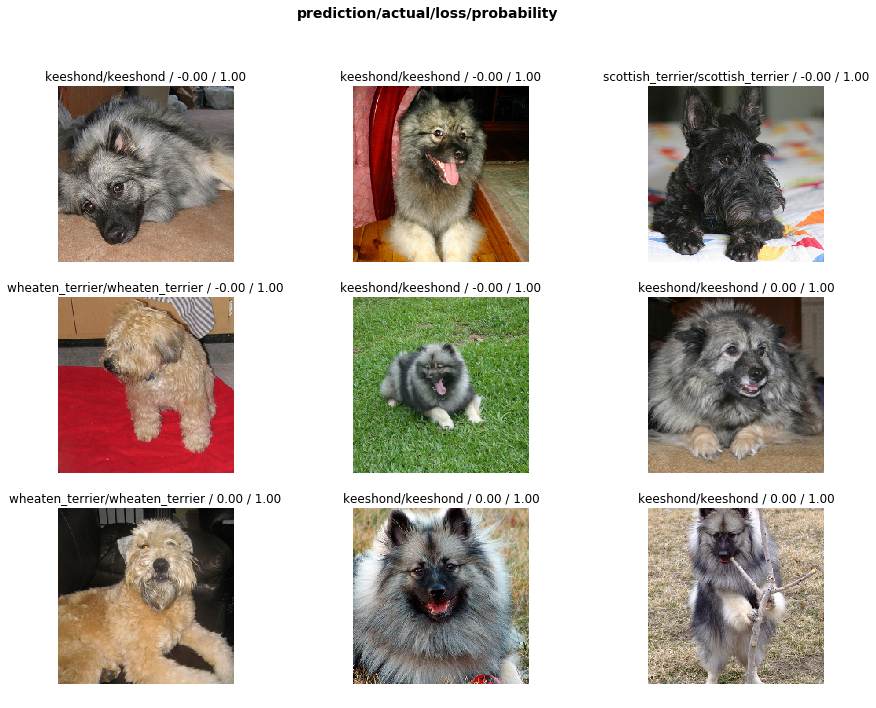

In [49]:
interp.plot_top_losses(9, figsize=(15,11),largest=False)

In [61]:
doc(interp.plot_top_losses)

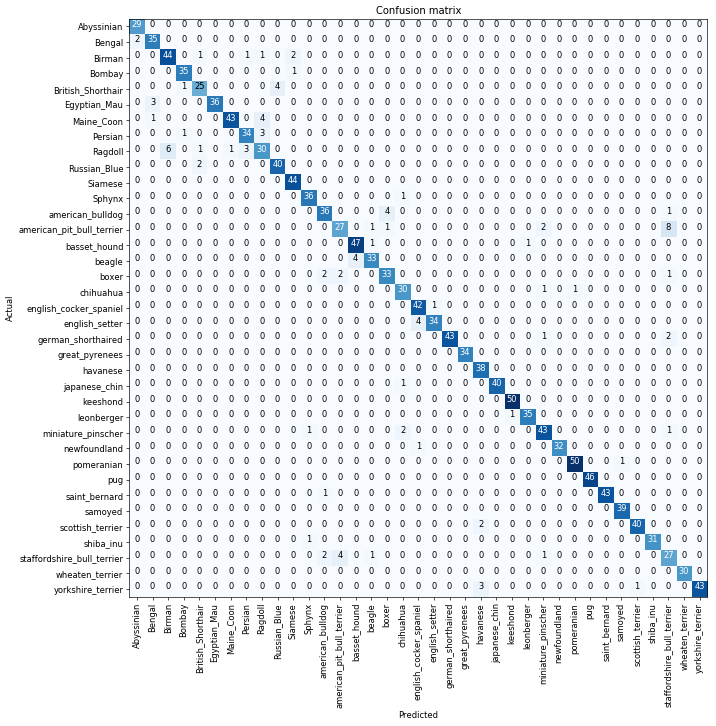

In [48]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [50]:
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 8),
 ('Ragdoll', 'Birman', 6),
 ('British_Shorthair', 'Russian_Blue', 4),
 ('Maine_Coon', 'Ragdoll', 4),
 ('american_bulldog', 'boxer', 4),
 ('beagle', 'basset_hound', 4),
 ('english_setter', 'english_cocker_spaniel', 4),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 4),
 ('Egyptian_Mau', 'Bengal', 3),
 ('Persian', 'Ragdoll', 3),
 ('Ragdoll', 'Persian', 3),
 ('yorkshire_terrier', 'havanese', 3)]

## Unfreezing, fine-tuning, and learning rates

Since our model is working as we expect it to, we will *unfreeze* our model and train some more.

In [39]:
learn_not_pretrained.load('stage-1-pre-trained');

In [40]:
learn_not_pretrained.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


More training using optimal range of learning rate and not the default to improve the accuracy

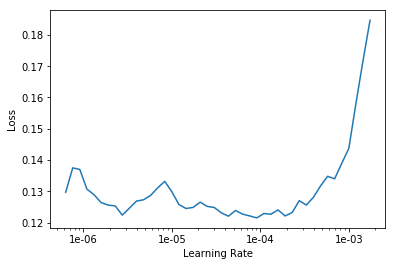

In [41]:
learn_not_pretrained.recorder.plot()

In [43]:
learn_not_pretrained.unfreeze()
learn_not_pretrained.fit_one_cycle(15, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.123751,0.750890,0.204330
2,0.131979,0.753349,0.202300
3,0.125339,0.755354,0.205007
4,0.128152,0.761405,0.201624
5,0.127627,0.753956,0.199594
6,0.136482,0.766935,0.203654
7,0.136615,0.763028,0.207713
8,0.116447,0.762883,0.205007
9,0.116064,0.769980,0.208390
10,0.123816,0.761887,0.202300


As you can see,after adjusting the learning rate, the error dropped by miniscule amount and barely went below 20%

In [44]:
learn_not_pretrained.save('stage-2-pre-trained')
#Saving the weights

## Training: resnet50

Now we will train in the same way as before but with one caveat: instead of using resnet34 as our backbone we will use resnet50 (resnet34 is a 34 layer residual network while resnet50 has 50 layers. It will be explained later in the course and you can learn the details in the [resnet paper](https://arxiv.org/pdf/1512.03385.pdf)).

Basically, resnet50 usually performs better because it is a deeper network with more parameters. Let's see if we can achieve a higher performance here. To help it along, let's us use larger images too, since that way the network can see more detail. We reduce the batch size a bit since otherwise this larger network will require more GPU memory.

In [58]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
                                   size=299, bs=bs//2).normalize(imagenet_stats)

In [59]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:07<00:00, 13758763.72it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


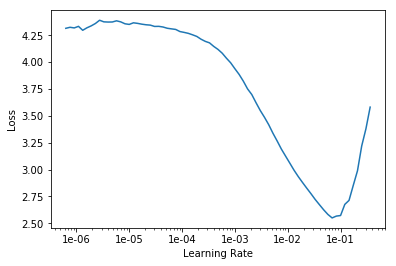

In [60]:
learn.lr_find()
learn.recorder.plot()

In [63]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate
1,0.710831,0.278101,0.077808
2,0.402640,0.240009,0.083221
3,0.341552,0.232548,0.076455
4,0.240019,0.204986,0.067659
5,0.218525,0.184020,0.056834
6,0.142501,0.167842,0.058187
7,0.108864,0.151189,0.054804
8,0.098549,0.155740,0.052097


In [64]:
learn.save('stage-1-50')

It's astonishing that it's possible to recognize pet breeds so accurately! Let's see if full fine-tuning helps: